<a href="https://colab.research.google.com/github/LuisJavierFI/EDA/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Morales González Luis Javier**
## **ljfi16xc@gmail.com**
# **Análisis Exploratorio de Datos**




### **1) Importantar las bibliotecas necesarias**




In [ ]:
import pandas as pd               # Para la manipulación y análisis de datos
import numpy as np                # Para crear vectores y matrices n dimensionales
import matplotlib.pyplot as plt   # Para la generación de gráficas a partir de los datos
import seaborn as sns             # Para la visualización de datos basado en matplotlib
%matplotlib inline 

In [ ]:
from google.colab import files
files.upload()

Saving country_vaccinations.csv to country_vaccinations.csv


{'country_vaccinations.csv': b'country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website\r\nAfghanistan,AFG,2021-02-22,0.0,0.0,,,,0.0,0.0,,,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing",World Health Organization,https://app.powerbi.com/view?r=eyJrIjoiYTkyM2VmMDUtNDJjOC00YjU2LWI3Y2MtNTRhMWY4YzU0YTRlIiwidCI6ImY2MTBjMGI3LWJkMjQtNGIzOS04MTBiLTNkYzI4MGFmYjU5MCIsImMiOjh9\r\nAfghanistan,AFG,2021-02-23,,,,,1367.0,,,,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing",World Health Organization,https://app.powerbi.com/view?r=eyJrIjoiYTkyM2VmMDUtNDJjOC00YjU2LWI3Y2MtNTRhMWY4YzU0YTRlIiwidCI6ImY2MTBjMGI3LWJkMjQtNGIzOS04MTBiLTNkYzI4MGFmYjU5MCIsImMiOjh9\r\nAfghanistan,AFG,2021-02-24,,,,,1367.0,,,,34.0,"Johnson&Johnson, O

In [ ]:
DatosVacunacion = pd.read_csv("country_vaccinations.csv")
DatosVacunacion

country  ...                                     source_website
0      Afghanistan  ...  https://app.powerbi.com/view?r=eyJrIjoiYTkyM2V...
1      Afghanistan  ...  https://app.powerbi.com/view?r=eyJrIjoiYTkyM2V...
2      Afghanistan  ...  https://app.powerbi.com/view?r=eyJrIjoiYTkyM2V...
3      Afghanistan  ...  https://app.powerbi.com/view?r=eyJrIjoiYTkyM2V...
4      Afghanistan  ...  https://app.powerbi.com/view?r=eyJrIjoiYTkyM2V...
...            ...  ...                                                ...
45252     Zimbabwe  ...  https://www.arcgis.com/home/webmap/viewer.html...
45253     Zimbabwe  ...  https://www.arcgis.com/home/webmap/viewer.html...
45254     Zimbabwe  ...  https://www.arcgis.com/home/webmap/viewer.html...
45255     Zimbabwe  ...  https://www.arcgis.com/home/webmap/viewer.html...
45256     Zimbabwe  ...  https://www.arcgis.com/home/webmap/viewer.html...

[45257 rows x 15 columns]

### **Paso 1: Descripción de la estructura de los datos**

1) Forma (dimensiones) del DataFrame

El atributo .shape de Pandas proporciona una estructura general de los datos. Devuelve la cantidad de filas y columnas que tiene el conjunto de datos.

In [ ]:
DatosVacunacion.shape


(45257, 15)

2) Tipos de datos (variables)

El atributo .dtypes muestra los tipos de datos de las columnas (variables y tipos).

In [ ]:
DatosVacunacion.dtypes

country                                 object
iso_code                                object
date                                    object
total_vaccinations                     float64
people_vaccinated                      float64
people_fully_vaccinated                float64
daily_vaccinations_raw                 float64
daily_vaccinations                     float64
total_vaccinations_per_hundred         float64
people_vaccinated_per_hundred          float64
people_fully_vaccinated_per_hundred    float64
daily_vaccinations_per_million         float64
vaccines                                object
source_name                             object
source_website                          object
dtype: object

### **Paso 2: Identificación de datos faltantes**

Una función útil de pandas es .isnull().sum() que regresa la suma de todos los valores nulos en cada variable.

In [ ]:
DatosVacunacion.isnull().sum()

country                                    0
iso_code                                   0
date                                       0
total_vaccinations                     20550
people_vaccinated                      21676
people_fully_vaccinated                24567
daily_vaccinations_raw                 24999
daily_vaccinations                       304
total_vaccinations_per_hundred         20550
people_vaccinated_per_hundred          21676
people_fully_vaccinated_per_hundred    24567
daily_vaccinations_per_million           304
vaccines                                   0
source_name                                0
source_website                             0
dtype: int64

In [ ]:
DatosVacunacion.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45257 entries, 0 to 45256
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              45257 non-null  object 
 1   iso_code                             45257 non-null  object 
 2   date                                 45257 non-null  object 
 3   total_vaccinations                   24707 non-null  float64
 4   people_vaccinated                    23581 non-null  float64
 5   people_fully_vaccinated              20690 non-null  float64
 6   daily_vaccinations_raw               20258 non-null  float64
 7   daily_vaccinations                   44953 non-null  float64
 8   total_vaccinations_per_hundred       24707 non-null  float64
 9   people_vaccinated_per_hundred        23581 non-null  float64
 10  people_fully_vaccinated_per_hundred  20690 non-null  float64
 11  daily_vaccinations_per_milli

### **Paso 3: Detección de valores atípicos**

Se pueden utilizar gráficos para tener una idea general de las distribuciones de los datos, y se sacan estadísticas para resumir los datos. Estas dos estrategias son recomendables y se complementan.

La distribución se refiere a cómo se distribuyen los valores en una variable o con qué frecuencia ocurren.

Para las variables numéricas, se observa cuántas veces aparecen grupos de números en una columna. Mientras que para las variables categóricas, son las clases de cada columna y su frecuencia.

**1) Distribución de variables numéricas**

* Se utilizan histogramas que agrupan los números en rangos.
* La altura de una barra muestra cuántos números caen en ese rango. 
* Se emplea hist() para trazar el histograma de las variables numéricas. También se pueden usar los parámetros: figsize y xrot para aumentar el tamaño de la cuadrícula y rotar el eje x 45 grados.

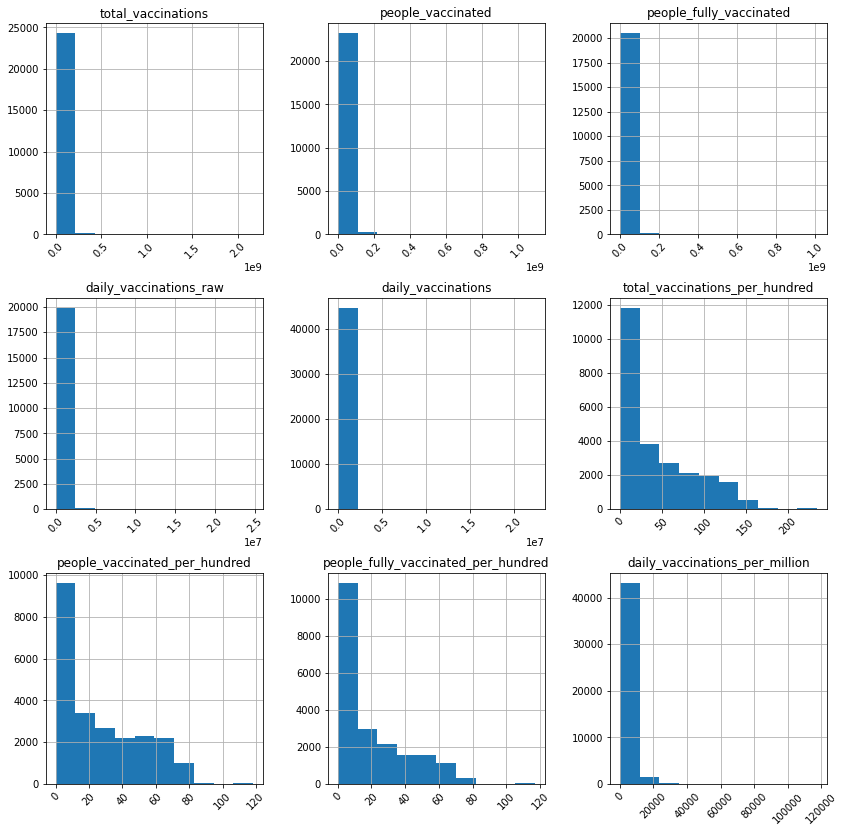

In [ ]:
DatosVacunacion.hist(figsize=(14,14), xrot=45)
plt.show()


In [ ]:
DatosVacunacion[DatosVacunacion.country == 'Mexico']


country  ...                                     source_website
25968  Mexico  ...  http://www.gob.mx/cms/uploads/attachment/file/...
25969  Mexico  ...  http://www.gob.mx/cms/uploads/attachment/file/...
25970  Mexico  ...  http://www.gob.mx/cms/uploads/attachment/file/...
25971  Mexico  ...  http://www.gob.mx/cms/uploads/attachment/file/...
25972  Mexico  ...  http://www.gob.mx/cms/uploads/attachment/file/...
...       ...  ...                                                ...
26230  Mexico  ...  http://www.gob.mx/cms/uploads/attachment/file/...
26231  Mexico  ...  http://www.gob.mx/cms/uploads/attachment/file/...
26232  Mexico  ...  http://www.gob.mx/cms/uploads/attachment/file/...
26233  Mexico  ...  http://www.gob.mx/cms/uploads/attachment/file/...
26234  Mexico  ...  http://www.gob.mx/cms/uploads/attachment/file/...

[267 rows x 15 columns]

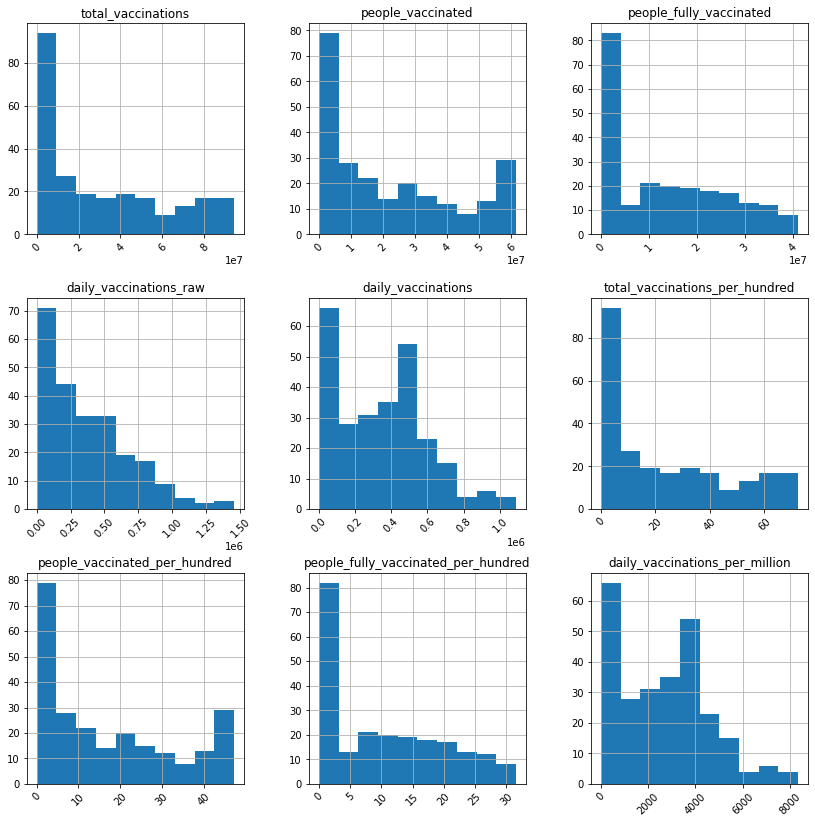

In [ ]:
DatosVacunacion[DatosVacunacion.country == 'Mexico'].hist(figsize=(14,14), xrot=45)
plt.show()

**Qué buscar:**

* Posibles valores atípicos, que pueden ser errores de medición.

* Límites que no tienen sentido, como valores porcentuales > 100.

**2) Resumen estadístico de variables numéricas**

Se sacan estadísticas usando describe() que muestra un resumen estadístico de las variables numéricas.

In [ ]:
DatosVacunacion[DatosVacunacion.country == 'Mexico'].describe()

total_vaccinations  ...  daily_vaccinations_per_million
count        2.490000e+02  ...                      266.000000
mean         3.080362e+07  ...                     2678.969925
std          3.012615e+07  ...                     1980.757516
min          2.924000e+03  ...                       10.000000
25%          2.676035e+06  ...                      848.250000
50%          2.100862e+07  ...                     2760.500000
75%          5.270496e+07  ...                     4008.000000
max          9.430053e+07  ...                     8353.000000

[8 rows x 9 columns]

Se incluye un recuento, media, desviación, valor mínimo, valor máximo, percentil inferior (25%), 50% y percentil superior (75%).

Por defecto, el percentil 50 es lo mismo que la mediana.

**3)   Diagramas para detectar posibles valores atípicos**

Para este tipo de gráficos se utiliza Seaborn, que permite generar diagramas de cajas para detectar valores atípicos.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


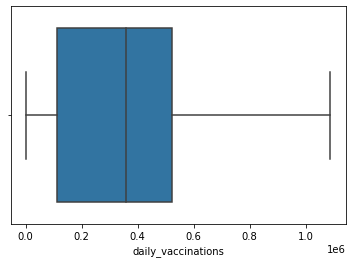

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


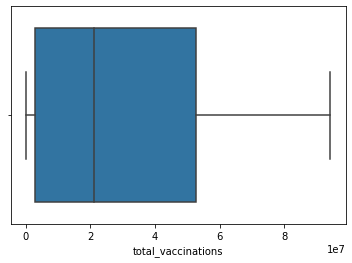

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


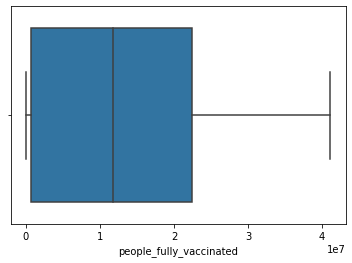

In [ ]:
VariablesValoresAtipicos = ['daily_vaccinations', 'total_vaccinations', 'people_fully_vaccinated']
for col in VariablesValoresAtipicos:
  sns.boxplot(col, data=DatosVacunacion[DatosVacunacion.country == 'Mexico'])
  plt.show()

4) Distribución de variables categóricas

Se refiere a la observación de las clases de cada columna (variable) y su frecuencia. Aquí, los gráficos ayudan para tener una idea general de las distribuciones, mientras que las estadísticas dan números reales.

In [ ]:
DatosVacunacion[DatosVacunacion.country == 'Mexico'].describe(include='object')


country  ...                                     source_website
count      267  ...                                                267
unique       1  ...                                                  1
top     Mexico  ...  http://www.gob.mx/cms/uploads/attachment/file/...
freq       267  ...                                                267

[4 rows x 6 columns]

Esta tabla es diferente al de los valores numéricos. Aquí, se obtiene el recuento de los valores de cada variable, el número de clases únicas, la clase más frecuente y con qué frecuencia ocurre esa clase en el conjunto de datos.

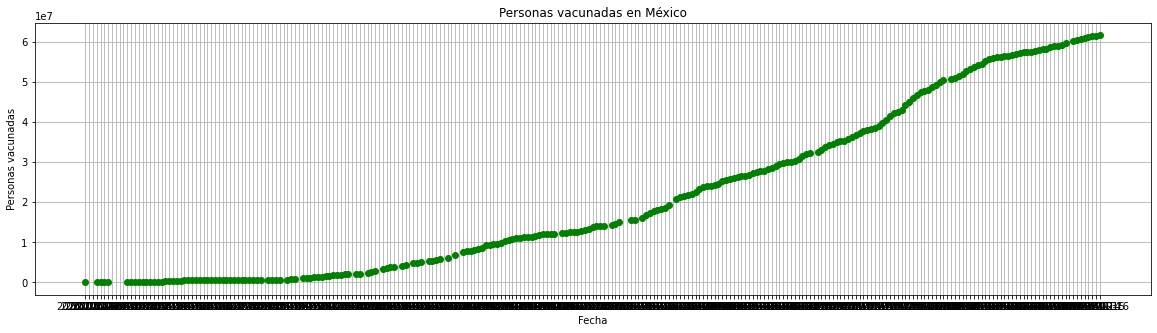

In [ ]:
plt.figure(figsize=(20, 5))
plt.plot(DatosVacunacion[DatosVacunacion.country == 'Mexico']['date'], 
         DatosVacunacion[DatosVacunacion.country == 'Mexico']['people_vaccinated'], color='green', marker='o')
plt.xlabel('Fecha')
plt.ylabel('Personas vacunadas')
plt.title('Personas vacunadas en México')
plt.grid(True)
plt.show()

### **Paso 4: Identificación de relaciones entre pares variables**

Una matriz de correlaciones es útil para analizar la relación entre las variables numéricas.
Se emplea la función corr()

In [ ]:
DatosVacunacion[DatosVacunacion.country == 'Mexico'].corr()

total_vaccinations  ...  daily_vaccinations_per_million
total_vaccinations                             1.000000  ...                        0.817365
people_vaccinated                              0.999259  ...                        0.823407
people_fully_vaccinated                        0.995915  ...                        0.781860
daily_vaccinations_raw                         0.643654  ...                        0.792255
daily_vaccinations                             0.817368  ...                        1.000000
total_vaccinations_per_hundred                 1.000000  ...                        0.817365
people_vaccinated_per_hundred                  0.999259  ...                        0.823417
people_fully_vaccinated_per_hundred            0.995914  ...                        0.781847
daily_vaccinations_per_million                 0.817365  ...                        1.000000

[9 rows x 9 columns]

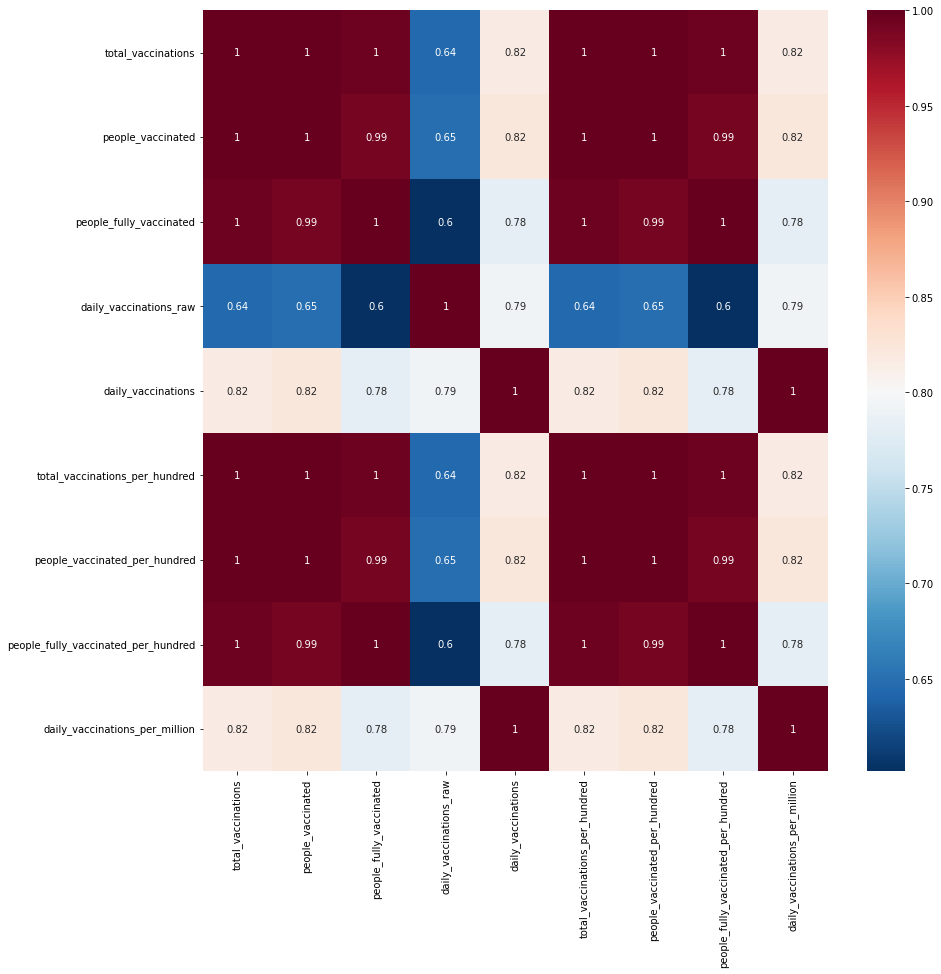

In [ ]:
plt.figure(figsize=(14,14))
sns.heatmap(DatosVacunacion[DatosVacunacion.country == 'Mexico'].corr(), cmap='RdBu_r', annot=True)
plt.show()